# Plotting 1

We have a handle on python now: we understand the data structures and enough about working with them to move on to stuff more directly relevant to data analysis. We know how to get data into Pandas from files, how to manipulate DataFrames and how to do basic statistics. 

Let's get started on making figures, arguably the best way to convey information about our data.

### The packages

In [1]:
import pandas as pd     #load the pandas package and call it pd
import matplotlib.pyplot as plt   # load the pyplot set of tools from the package matplotlib. Name it plt for short.

# This following is a jupyter magic command. It tells jupyter to insert the plots into the notebook
# rather than a new window.
%matplotlib inline      

matplotlib is a very popular package that bundles tools for creating visualizations. The documentation is [here](https://matplotlib.org/contents.html). We will look at some specific plot types in class, but you can learn about many different types [thumbnail gallery](https://matplotlib.org/gallery/index.html). \[Warning: not all the figures in the thumbnail gallery are good figures.\]

Copy the `gdp_components_simple.csv` file into your cwd (or load it using a file path to its location) and load it into pandas.

In [2]:
gdp = pd.read_csv('gdp_components_simple.csv', index_col=0)  # load data from file, make date the index

print(gdp.head(2))                                    # print the first and last few rows to make sure all is well
print('\n', gdp.tail(2))


         GDPA   GPDIA    GCEA  EXPGSA  IMPGSA
DATE                                         
1929  104.556  17.170   9.622   5.939   5.556
1930   92.160  11.428  10.273   4.444   4.121

            GDPA     GPDIA      GCEA    EXPGSA    IMPGSA
DATE                                                   
2016  18707.189  3169.887  3290.979  2217.576  2738.146
2017  19485.394  3367.965  3374.444  2350.175  2928.596


I don't like these variable names. 

In [4]:
gdp.rename(columns = {'GDPA':'gdp', 'GPDIA':'inv', 'GCEA':'gov', 'EXPGSA':'ex', 'IMPGSA':'im' }, inplace=True)

Let's get plotting. matplotlib graphics are based around two new object types. 
1. The figure object: think of this as the canvas we will draw figures onto
2. The axes object: think of this as the figure itself and all the components

To create a new figure, we call the `subplots()` method of `plt`. Notice the use of multiple assignment.

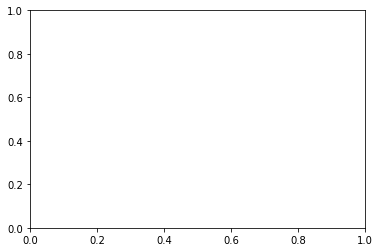

In [4]:
fig, ax = plt.subplots()    # passing no arguments gets us one fig object and one axes object

In [5]:
print(type(fig))

print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


We apply methods to the axes to actually plot the data. Here is a scatter plot. \[Try `ax.` and hit TAB...\] 

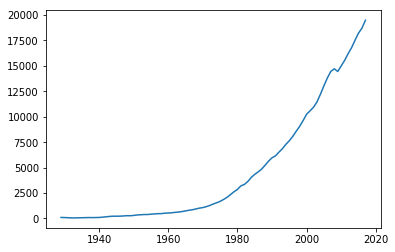

In [6]:
fig, ax = plt.subplots() 
ax.plot(gdp.index, gdp['gdp'])                  # scatter plot of gdp vs. time

First, note that the plot is a Line2D object. This is absolutely not important for us, but when you see jupyter print out `<matplotlib.lines.Line2D at ...>` that is what it is telling us. Everything in python is an object. 

Second, a scatter plot needs two columns of data, one for the x-coordinate and one for the y-coordinate. I am using `gdp` for the y-coordinate and the years for the x-coordinate. I set years as the index variable, so to retrieve it I used the `.index` attribute. 

Third, this plot needs some work. I do not like this line color. More importantly, I am missing labels and a title. These are **extremely important.** 

Text(0.5,1,'U.S. Gross Domestic Product')

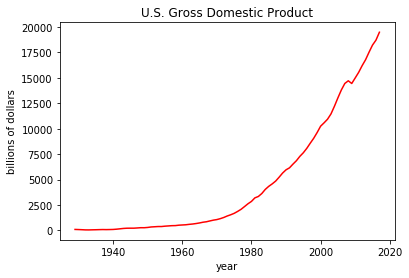

In [7]:
fig, ax = plt.subplots() 
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red'                   # set the line color to red
       )                  

ax.set_ylabel('billions of dollars')  # add the y-axis label
ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product')

This is looking pretty good. While I am a fanatic when it comes to labeling things, I probably wouldn't label the x-axis. You have to have some faith in the reader. 

I also do not like 'boxing' my plots. There is a philosophy about visualizations that says: Every mark on your figure should convey information. If it does not, then it is clutter and should be removed. I am not sure who developed this philosophy [(Marie Kondo?)](https://en.wikipedia.org/wiki/Marie_Kondo) but I think it is a useful benchmark.

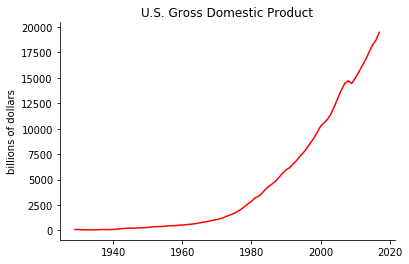

In [8]:
fig, ax = plt.subplots() 
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red'                   # set the line color to red
       )  

ax.set_ylabel('billions of dollars')  # add the y-axis label
# ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

### Practice: Plots
Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Copy the code from the last plot and add a second line that plots 'gov'. To this, just add a new line of code to the existing code. `ax.plot(gdp.index, gdp['gov]])`

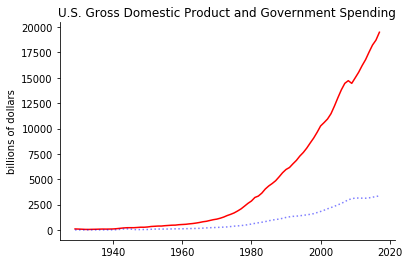

In [9]:
fig, ax = plt.subplots() 
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red'                   # set the line color to red
       )  

ax.plot(gdp.index, gdp['gov'],        # line plot of gdp vs. time
        color='blue',                   # set the line color to blue
        alpha = 0.5,
        linestyle = ':'
       )  
ax.set_ylabel('billions of dollars')  # add the y-axis label
# ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product and Government Spending')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

2. Modify your code to give the figure a better title
3. Modify your code to make government consumption blue
4. Modify your code to add the argument `alpha=0.5` to the plot method for gov. What does it change? If you want to learn more try 'alpha composite' in Google.
5. Modify your code to make the gov line dashed. Try the argument `linestyle='--'`.  What is linestyle '-.' or ':' ?

### A few more options to get us started
We have two lines on our figure. Which one is which? Not labeling our line is malpractice. Two approaches

1. Add a legend
2. Add text to the figure

Both are good options. I prefer the second for simple plots.

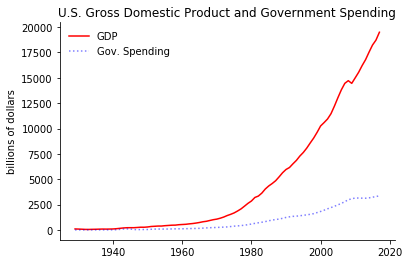

In [10]:
# The first option. Add labels to your plot commands, then call ax.legend.

fig, ax = plt.subplots() 
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'GDP'
       )  

ax.plot(gdp.index, gdp['gov'],        # line plot of gdp vs. time
        color='blue',                   # set the line color to blue
        alpha = 0.5,
        linestyle = ':',
        label = 'Gov. Spending'
       )  
ax.set_ylabel('billions of dollars')  # add the y-axis label
# ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product and Government Spending')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.legend(frameon=False)                           # Show the legend. frameon=False kills the box around the legend

Ah, I feel much better now that I know which line is which. Here is the second approach.

Text(1999,4500,'Gov. Spending')

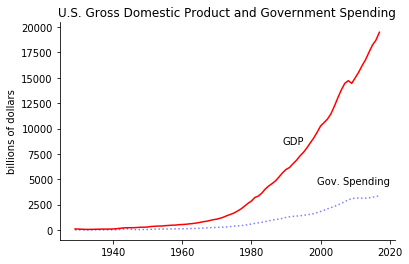

In [11]:
# The second option. Add text using the annotate method. Note that I can leave the labels in the plot commands.

fig, ax = plt.subplots() 
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'GDP'
       )  

ax.plot(gdp.index, gdp['gov'],        # line plot of gdp vs. time
        color='blue',                   # set the line color to blue
        alpha = 0.5,
        linestyle = ':',
        label = 'Gov. Spending'
       )  
ax.set_ylabel('billions of dollars')  # add the y-axis label
# ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product and Government Spending')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.text(1989, 8500, 'GDP')            # text(x, y, string)
ax.text(1999, 4500, 'Gov. Spending')            # text(x, y, string)

### About graphical excellence
[Edward Tufte's](https://www.edwardtufte.com/tufte/books_vdqi) *The Visual Display of Quantitative Information* is a masterpiece of 'thinking hard about visualizations.' The book is worth a read (or a look through). His Principles of Graphic Excellence are great to keep in mind. Two of my favorites:
* Graphical excellence consists of complex ideas communicated with clarity, precision, and efficiency
* Graphical excellence is that which gives the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space. 

Let us all strive for graphical excellence.

This listicle *Ten Simple Rules for Better Figures* ([Rougier, Droettboom, and Bourne, 2014](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833#s10)) has some good advice, too. My favorite is **Do not trust the defaults.**

[Not long, ago, this was Excel's default chart formatting](http://media.juiceanalytics.com/images/blog/excel_line_graph.png)

### Getting plots out of your notebook
While I love jupyter notebooks, my research output is usually an article distributed as a pdf. 

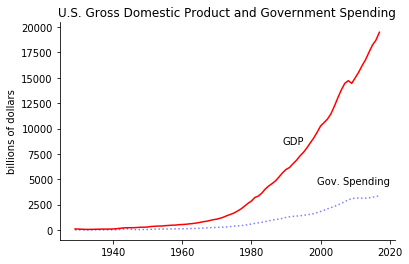

In [12]:
fig, ax = plt.subplots() 
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'GDP'
       )  

ax.plot(gdp.index, gdp['gov'],        # line plot of gdp vs. time
        color='blue',                   # set the line color to blue
        alpha = 0.5,
        linestyle = ':',
        label = 'Gov. Spending'
       )  
ax.set_ylabel('billions of dollars')  # add the y-axis label
# ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product and Government Spending')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.text(1989, 8500, 'GDP')            # text(x, y, string)
ax.text(1999, 4500, 'Gov. Spending')            # text(x, y, string)

plt.savefig('gdp.pdf', bbox_inches='tight')          # Create a pdf and save to cwd 
plt.savefig('../gdp.png')          # Create a png and save to the folder that contains the cwd

When saving a pdf, I use the `bbox_inches='tight'` argument to kill extra whitespace around the figure. You can also set things like orientation, dpi, and metadata. Check the documentation if you need to tweak your output. 

### More plot types
The line plot is the tip of the iceberg. matplotlib support many plot types. Let's take a look at histograms. 

How variable is US gdp growth?

In [5]:
# Create a histogram of gdp growth rates.

gdp['gdp_growth'] = gdp['gdp'].pct_change()*100 # pct_change() creates growth rates NOT percent change. Not a self-documenting name.
gdp.head()

,gdp,inv,gov,ex,im,gdp_growth
DATE,,,,,,
1929,104.556,17.170,9.622,5.939,5.556,NaN
1930,92.160,11.428,10.273,4.444,4.121,-11.855848
1931,77.391,6.549,10.169,2.906,2.905,-16.025391
1932,59.522,1.819,8.946,1.975,1.932,-23.089248
1933,57.154,2.276,8.875,1.987,1.929,-3.978361


We could have used the `diff()` or the `shift()` methods to do something similar, but wow, pct_change is so luxe. A quick plot to take a look.

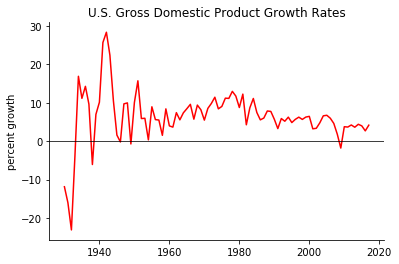

In [14]:
fig, ax = plt.subplots() 
ax.plot(gdp.index, gdp['gdp_growth'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'GDP Growth'
       )  

ax.set_ylabel('percent growth')  # add the y-axis label
ax.set_title('U.S. Gross Domestic Product Growth Rates')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.axhline(y=0, color='black', linewidth=0.75)  # Add a horizontal line at y=0

The great depression and the WWII buildup really stick out. 

Notice that I added a line at zero. My thinking is that this line adds information: the reader can easily see that growth rates are mostly positive and that the great depression was really bad. 

It is also obvous that the volitility of gdp has fallen over time, but let's approach a bit differently. 

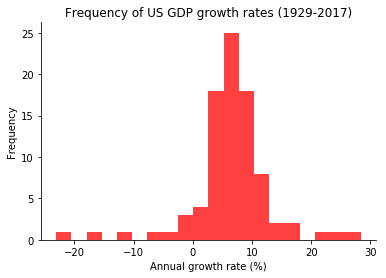

In [15]:
fig, ax = plt.subplots() 

# hist does not like NaN. (I'm a bit surprised.) I use the dropna() method to kill off the missing value
ax.hist(gdp['gdp_growth'].dropna(), bins=20, color='red', alpha=0.75)        # histogram of GDP growth rates
      

ax.set_ylabel('Frequency')  # add the y-axis label
ax.set_xlabel('Annual growth rate (%)')
ax.set_title('Frequency of US GDP growth rates (1929-2017)')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

#ax.axhline(y=0, color='black', linewidth=0.75)  # Add a horizontal line at y=0

plt.show()

### Practice: Histograms
Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Break the data up into two periods: 1929-1985 and 1985-2017
2. Compute the mean and the standard deviation for the gdp growth rate in each sample.
3. Create a separate histogram for each sample. Make the early period historgram blue and the late historgram black. Make any changes to them that you deem appropriate.
4. Use text() to add the mean and std to a blank area of the histograms. 
3. Save the two histograms as pdfs. Give them reasonable names. 


*Challenging*. Can you find a way to store the value of the mean and std to a variable and print the variable out on the histogram? Redo part 4. 

In [11]:
gdp_early = gdp.loc[gdp.index < 1986, 'gdp_growth']
gdp_late = gdp.loc[gdp.index > 1985, 'gdp_growth']

print(gdp_early.mean(), gdp_early.std())
print(gdp_late.mean(), gdp_late.std())


7.224599500974901 8.392606036077561
4.822433250409484 1.8860614153267923


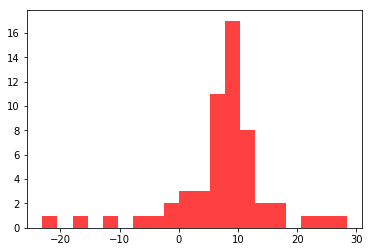

In [13]:
fig, ax = plt.subplots() 

# hist does not like NaN. (I'm a bit surprised.) I use the dropna() method to kill off the missing value
ax.hist(gdp_early.dropna(), bins=20, color='red', alpha=0.75)        # histogram of GDP growth rates
      
plt.show()

### Subplots
We can generate several axes in one figure using the subplot() method. \[This method is not misnamed!\]


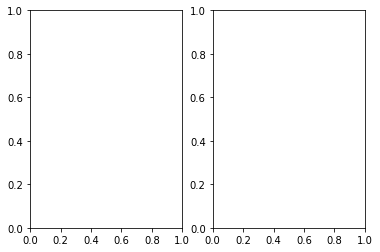

In [17]:
fig, ax = plt.subplots(1, 2)  # one row, two columns of axes

In [19]:
print(type(ax))

<class 'numpy.ndarray'>


So `ax` is now an array that holds the axes for each plot. Each axes works just like before. Now we just have to tell python **which** axes to act on.

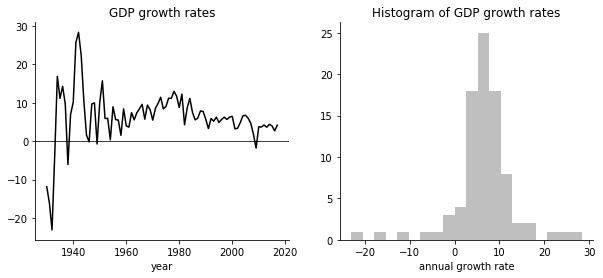

In [41]:
# Set a variable for plot color so I can change it everywhere easily
my_plot_color = 'black'

# I am using the figsize parameter here. It takes (width, height) in inches. 
fig, ax = plt.subplots(1, 2, figsize=(10,4))  # one row, two columns of axes

# The fist plot
ax[0].plot(gdp.index, gdp['gdp_growth'], color=my_plot_color, label = 'GDP Growth')     # a line plot of GDP growth rates
ax[0].axhline(y=0, color='black', linewidth=0.75)  # Add a horizontal line at y=0
ax[0].set_xlabel('year')
ax[0].set_title('GDP growth rates')
ax[0].spines['right'].set_visible(False) # get ride of the line on the right
ax[0].spines['top'].set_visible(False)   # get rid of the line on top

# The second plot
ax[1].hist(gdp['gdp_growth'].dropna(), bins=20, color=my_plot_color, alpha=0.25)        # histogram of GDP growth rates
ax[1].set_xlabel('annual growth rate')
ax[1].set_title('Histogram of GDP growth rates')
ax[1].spines['right'].set_visible(False) # get ride of the line on the right
ax[1].spines['top'].set_visible(False)   # get rid of the line on top

plt.savefig('double.pdf')
plt.show()

You can imagine how useful this can be. We can loop over sets of axes and automate making plots if we have several variables. 

I changed a couple other things here, too. 
1. I used the `figsize` parameter to subplot. This is a tuple of figure width and height in inches. (Inches! Take that rest of the world!) The height and width are of the **printed** figure. You will notice that jupyter notebook scaled it down for display. This is useful when you are preparing graphics for a publication and you need to meet an exact figure size. 
2. I made the line color a variable, so it is easy to change all the line colors at one. For example, I like red figures when I am giving presentations, but black figures when I am creating pdfs that will be printed out on a black and white printer.